In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [4]:
%matplotlib inline

In [78]:
df=pd.read_csv("CC_GENERAL.csv")


In [77]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [8]:
df=df.drop("CUST_ID",axis=1)##drop meaningless value

In [9]:
#do iterativeimputer because of feature count.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
my_df = pd.DataFrame(imputed, columns=df.columns)

In [76]:
print(my_df)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [12]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      my_df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


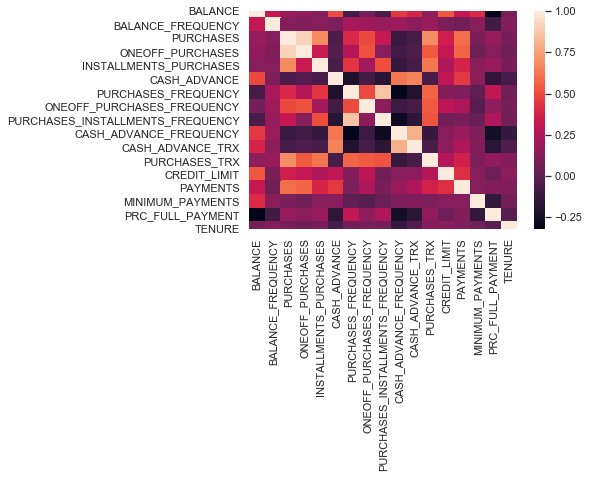

In [71]:
corrMatrix = my_df.corr()
sns.heatmap(corrMatrix)
plt.show()

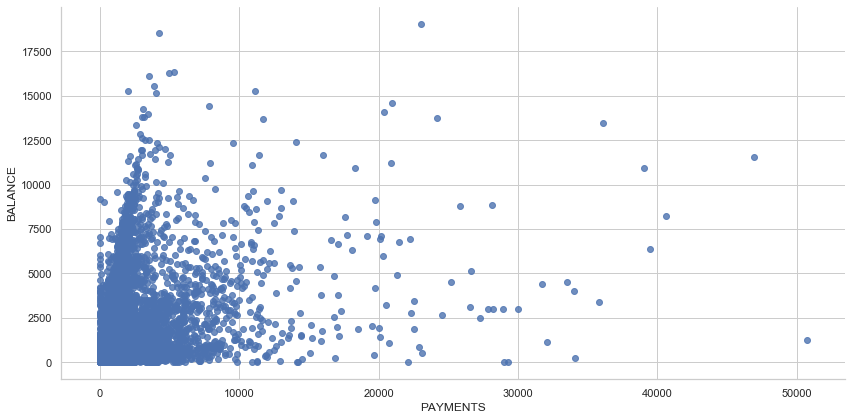

In [75]:
sns.set_style('whitegrid')
sns.lmplot('PAYMENTS','BALANCE',data=my_df,
           palette='coolwarm',size=6,aspect=2,fit_reg=False)
plt.show()

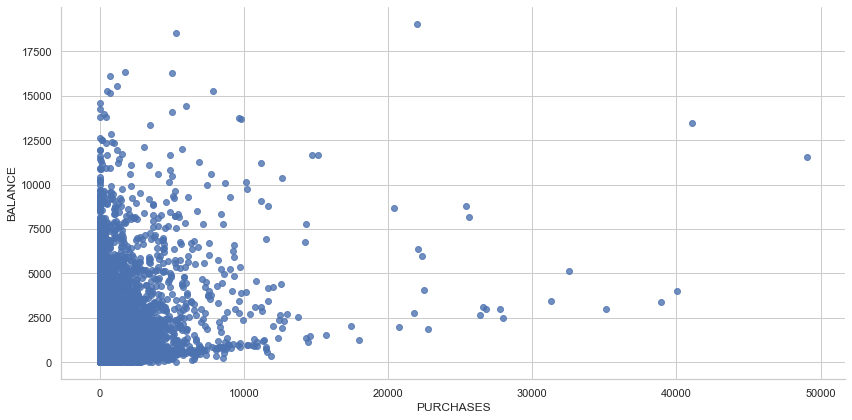

In [74]:
sns.set_style('whitegrid')
sns.lmplot('PURCHASES','BALANCE',data=my_df,
           palette='coolwarm',size=6,aspect=2,fit_reg=False)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_my_df = sc.fit_transform(my_df)

In [61]:
print(scaled_my_df)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30143092,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09785364,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09264589,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32586807,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33728068,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32335526,
        -0.52555097, -4.12276757]])

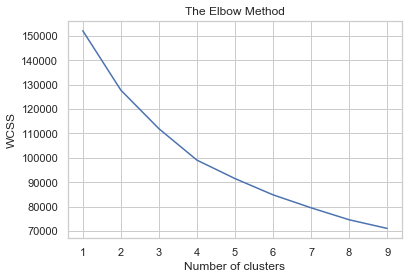

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(scaled_my_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [17]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)##dirsek 4 te
y_kmeans=kmeans.fit_predict(scaled_my_df)

In [69]:
print(y_kmeans)

array([1, 2, 0, ..., 0, 1, 1])

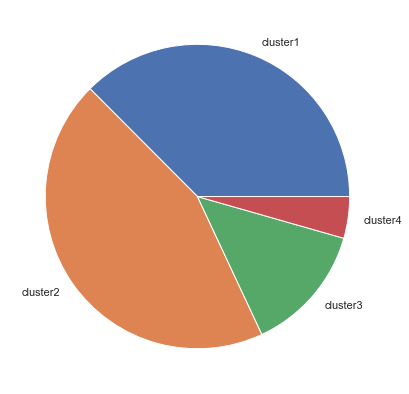

In [73]:

cluster_counts=[len(my_df[y_kmeans==0]),len(my_df[y_kmeans==1]),len(my_df[y_kmeans==2]),len(my_df[y_kmeans==3])]
cluster_names=["cluster1","cluster2","cluster3","cluster4"]
fig = plt.figure(figsize =(10, 7))
plt.pie(cluster_counts, labels = cluster_names)
plt.show()

In [72]:
print(cluster_counts)

[3354, 3981, 1219, 396]


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(scaled_my_df)
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": y_kmeans})], axis = 1)

In [21]:
print(pca_df)
print(y_kmeans)

          pca1      pca2  cluster
0    -1.684566 -1.070667        1
1    -1.132225  2.509281        2
2     0.969121 -0.383985        0
3    -0.885331  0.012888        1
4    -1.600482 -0.681826        1
...        ...       ...      ...
8945 -0.364170 -2.012360        0
8946 -0.581056 -1.671690        0
8947 -0.930515 -1.806972        0
8948 -2.338620 -0.652013        1
8949 -0.558853 -0.401197        1

[8950 rows x 3 columns]
[1 2 0 ... 0 1 1]


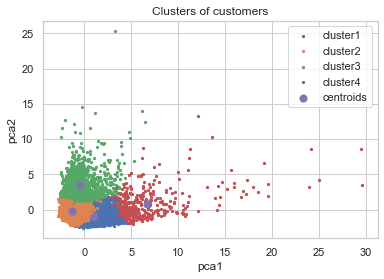

In [22]:
plt.scatter(pca_df[y_kmeans==0]["pca1"],pca_df[y_kmeans==0]["pca2"],label="cluster1",s=5)
plt.scatter(pca_df[y_kmeans==1]["pca1"],pca_df[y_kmeans==1]["pca2"],label="cluster2",s=5)
plt.scatter(pca_df[y_kmeans==2]["pca1"],pca_df[y_kmeans==2]["pca2"],label="cluster3",s=5)
plt.scatter(pca_df[y_kmeans==3]["pca1"],pca_df[y_kmeans==3]["pca2"],label="cluster4",s=5)
plt.scatter((pca_df.groupby(by="cluster").mean())["pca1"],(pca_df.groupby(by="cluster").mean())["pca2"],label="centroids",s=50)
plt.title("Clusters of customers")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.show()
